In [0]:
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import scipy.io as sio
from scipy.stats import pearsonr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = Path('drive/My Drive/Colab Notebooks/Neuroscience')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
kind = 'normal'
filenames = [file.name for file in os.scandir(path/f'data/{kind}') if file.name.endswith('mat')]
mt = sio.loadmat(path/f'data/{kind}/{filenames[0]}')

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot(xs, ys, zs, c, filename, fig, order):
  ax = fig.add_subplot(330+order, projection='3d')
  normalized = (c - np.mean(c))/ np.std(c)
  ax.scatter(xs, ys, zs, c=-normalized, marker='o', cmap='hot')
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  ax.set_title(filename)
  plt.show()

def save_plot(xs, ys, zs, c, filename, fig, order, save_name):
  ax = fig.add_subplot(330+order, projection='3d')
  normalized = (c - np.mean(c))/ np.std(c)
  ax.scatter(xs, ys, zs, c=-normalized, marker='o', cmap='hot')
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  ax.set_title(filename)
  plt.savefig(path/save_name)

In [0]:
def get_plot(filename, fig, order):
  mt = sio.loadmat(path/f'data/{filename}')
  responses = mt['stim'][0]['resp'][0]
  spatial = mt['med']
  classes = pd.read_csv(path/'class_map.csv')
  istim = mt['stim'][0]['istim'][0]
  human_labels = classes.iloc[istim.flatten() - 1, -1].reset_index(drop=True).to_numpy().flatten()
  train = pd.DataFrame(data=responses)
  train['label'] = human_labels
  encoder = LabelEncoder()
  train['label'] = encoder.fit_transform(train['label'].values)
  target = 'label'

  pearson_correlations = {column : pearsonr(train[column], train[target])[0] for column in train if column != target}
  prsn_abs = {key: abs(pearson_correlations[key]) for key in pearson_correlations.keys()}
  neurons = sorted(prsn_abs, key=prsn_abs.get, reverse=True)[:300]
  coefs = [prsn_abs[neuron] for neuron in neurons]
  coors = spatial[neurons]

  plot(coors[:, 0], coors[:, 1], coors[:, 2], coefs, filename, fig, order)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


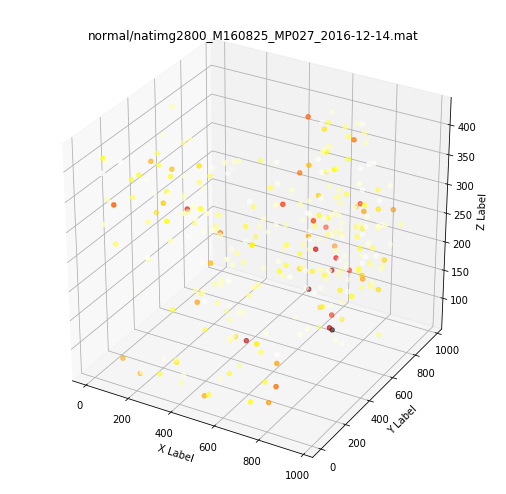

In [6]:
fig = plt.figure(figsize=(30, 30))
for i, filename in enumerate(filenames):
  # get_plot(f"{kind}/{filename}", fig, i+1)
  filename, fig, order = f"{kind}/{filename}", fig, i+1

  mt = sio.loadmat(path/f'data/{filename}')
  responses = mt['stim'][0]['resp'][0]
  spatial = mt['med']
  classes = pd.read_csv(path/'class_map.csv')
  istim = mt['stim'][0]['istim'][0]
  human_labels = classes.iloc[istim.flatten() - 1, -1].reset_index(drop=True).to_numpy().flatten()
  train = pd.DataFrame(data=responses)
  train['label'] = human_labels
  encoder = LabelEncoder()
  train['label'] = encoder.fit_transform(train['label'].values)
  target = 'label'

  pearson_correlations = {column : pearsonr(train[column], train[target])[0] for column in train if column != target}
  prsn_abs = {key: abs(pearson_correlations[key]) for key in pearson_correlations.keys()}
  neurons = sorted(prsn_abs, key=prsn_abs.get, reverse=True)[:300]
  coefs = [prsn_abs[neuron] for neuron in neurons]
  coors = spatial[neurons]

  # plot(coors[:, 0], coors[:, 1], coors[:, 2], coefs, filename, fig, order)

  xs, ys, zs, c, filename, fig, order = coors[:, 0], coors[:, 1], coors[:, 2], coefs, filename, fig, order
  ax = fig.add_subplot(330+order, projection='3d')
  normalized = (c - np.mean(c))/ np.std(c)
  ax.scatter(xs, ys, zs, c=-normalized, marker='o', cmap='hot')
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
  ax.set_title(filename)
  plt.show()

In [0]:
# def get_df(filename):
#   mt = sio.loadmat(path/f'data/{filename}')
#   responses = mt['stim'][0]['resp'][0]
#   spatial = mt['med']
#   classes = pd.read_csv(path/'class_map.csv')
#   istim = mt['stim'][0]['istim'][0]
#   human_labels = classes.iloc[istim.flatten() - 1, -1].reset_index(drop=True).to_numpy().flatten()
#   train = pd.DataFrame(data=responses)


#   encoder = LabelEncoder()
#   train['label'] = human_labels
#   train['label'] = encoder.fit_transform(train['label'].values)

#   onehot = OneHotEncoder()
#   train['mouse'] = "_".join(filenames[0].split('_')[1:3])
#   train['mouse'] = encoder.fit_transform(train['mouse'].values)

#   target = 'label'
#   pearson_correlations = {column : pearsonr(train[column], train[target])[0] for column in train if column != target}
#   prsn_abs = {key: abs(pearson_correlations[key]) for key in pearson_correlations.keys()}
#   neurons = sorted(prsn_abs, key=prsn_abs.get, reverse=True)[:1000]
#   coefs = [prsn_abs[neuron] for neuron in neurons]
#   coors = spatial[neurons]
#   plot(coors[:, 0], coors[:, 1], coors[:, 2], coefs)
#   return coors, coefs